In [287]:
import cv2
import matplotlib.pyplot as plt
from random import randrange
import numpy as np

# Cells

### Image preprocessing

loading the image and turning it into grayscale

(-0.5, 999.5, 999.5, -0.5)

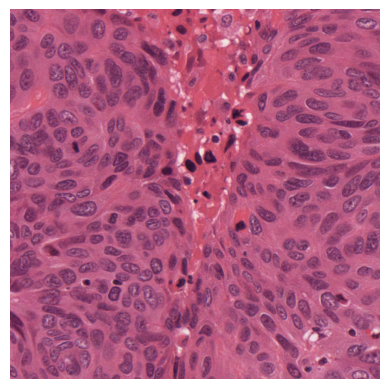

In [288]:
img = cv2.imread('data/TCGA-18-5592-01Z-00-DX1.tif')
# img = cv2.imread('data/TCGA-21-5784-01Z-00-DX1.tif')
# img = cv2.imread('data/TCGA-21-5786-01Z-00-DX1.tif')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # display in rgb
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

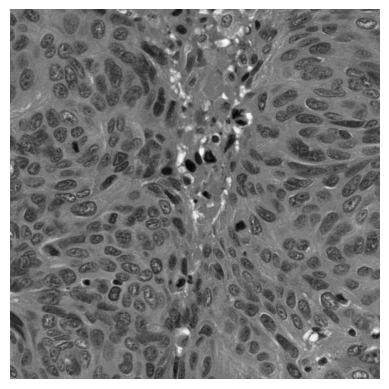

In [289]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = img[:, :, 2]   
plt.imshow(gray, cmap='gray') 
plt.axis('off')

image filtering using gaussian blur

(-0.5, 999.5, 999.5, -0.5)

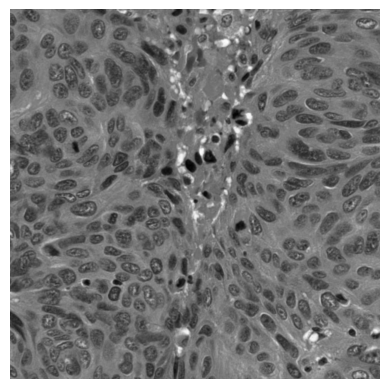

In [290]:
filtered = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(filtered, cmap='gray')
plt.axis('off')

### Binarization

in this case  we can use global thresholding

(-0.5, 999.5, 999.5, -0.5)

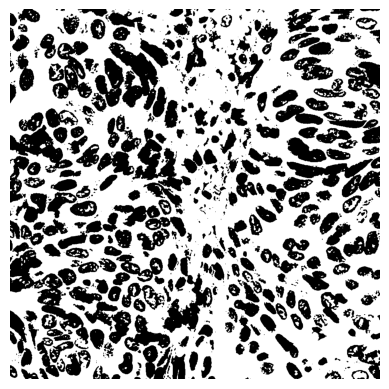

In [291]:
_, mask = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.axis('off')

morphological closing to remove small elements (which are not cells) from the created mask

(-0.5, 999.5, 999.5, -0.5)

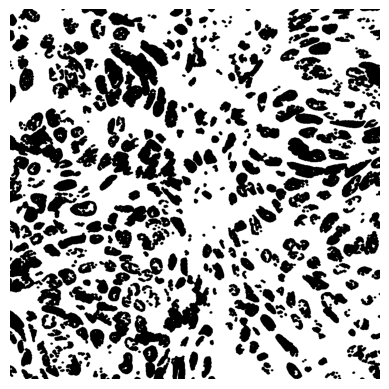

In [292]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(7, 7))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.imshow(mask, cmap='gray')
plt.axis('off')

<!-- morphological opening to further clean up the mask and cover white spots in the cells -->
erode to cover white spots inside the cells

(-0.5, 999.5, 999.5, -0.5)

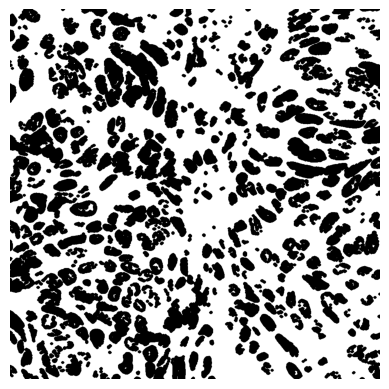

In [293]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(3, 3))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
mask = cv2.erode(mask, kernel, iterations=1)

plt.imshow(mask, cmap='gray')
plt.axis('off')

### Segmentation and Contour analysis

inverting the created mask

(-0.5, 999.5, 999.5, -0.5)

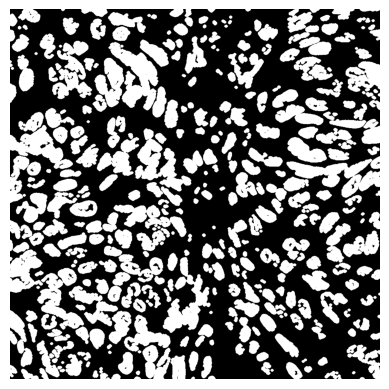

In [294]:
mask = cv2.bitwise_not(mask)

plt.imshow(mask, cmap='gray')
plt.axis('off')

loop through the found contours and draw them on the original image


Take 1
-----------------------
Number of cells:  332


(-0.5, 999.5, 999.5, -0.5)

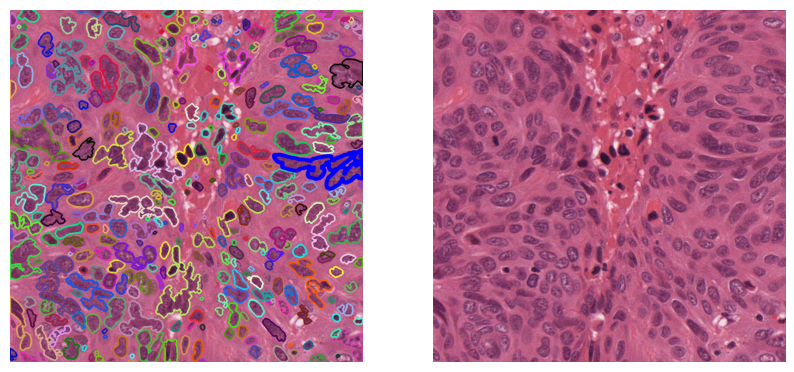

In [295]:
import copy
segmented_img = copy.deepcopy(img)

contours, h = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
n = 0

areas = []
biggest = { 'area': -1 }
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    if area > 50:
        areas.append(area)

        if area > biggest['area']:
            biggest['area'] = area
            biggest['contour'] = i

        colour = (0, 255, 0)
        colour = (randrange(255), randrange(255), randrange(255))
        cv2.drawContours(segmented_img, contours, i, colour, 3)
        n += 1

print('\nTake 1')
print('-----------------------')
print('Number of cells: ', n)
cv2.drawContours(segmented_img, contours, biggest['contour'], (255, 0, 0), 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.axis('off')

## Take 2

using only the red channel, trying different morphological operations

(-0.5, 999.5, 999.5, -0.5)

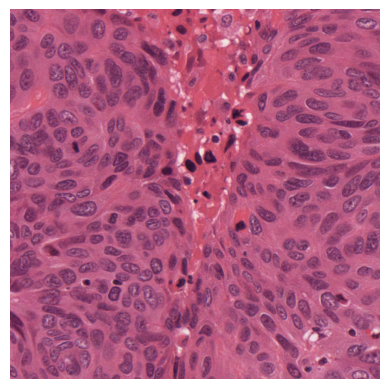

In [296]:
img = cv2.imread('data/TCGA-18-5592-01Z-00-DX1.tif')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # convert to rgb
plt.axis('off')

using only the red channel instead of converting the image into grayscale

(-0.5, 999.5, 999.5, -0.5)

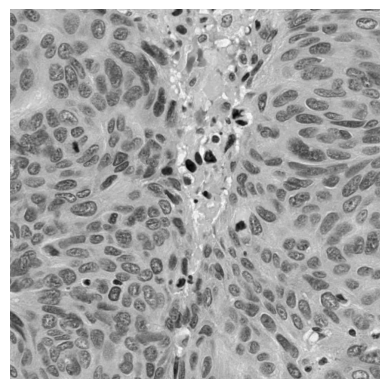

In [297]:
gray = img[:, :, 2] # using only red channel

plt.imshow(gray, cmap='gray')
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

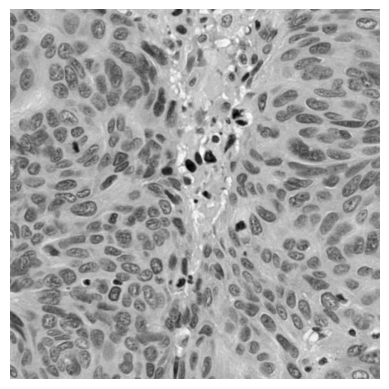

In [298]:
filtered = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(filtered, cmap='gray')
plt.axis('off')

thresholding and inverting the mask

(-0.5, 999.5, 999.5, -0.5)

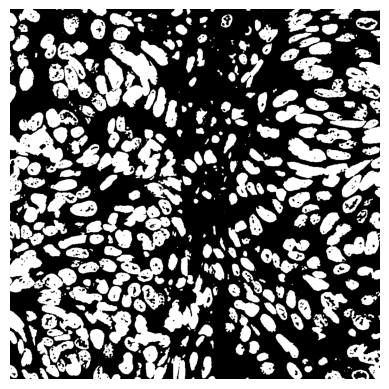

In [299]:
_, mask = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
mask = cv2.bitwise_not(mask)

plt.imshow(mask, cmap='gray')
plt.axis('off')

using the opening operation to further clean the mask

(-0.5, 999.5, 999.5, -0.5)

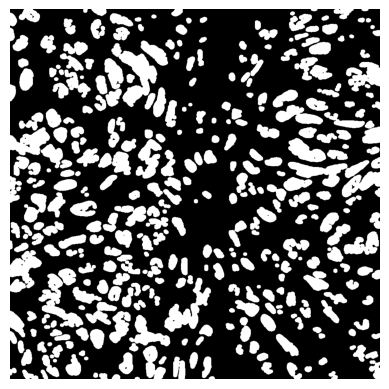

In [300]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

plt.imshow(mask, cmap='gray')
plt.axis('off')

In [301]:
# kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(3, 3))
# mask = cv2.dilate(mask, kernel, iterations=1)
# # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

# plt.imshow(mask, cmap='gray')
# plt.axis('off')


Take 2
-----------------------
Number of cells:  355


(-0.5, 999.5, 999.5, -0.5)

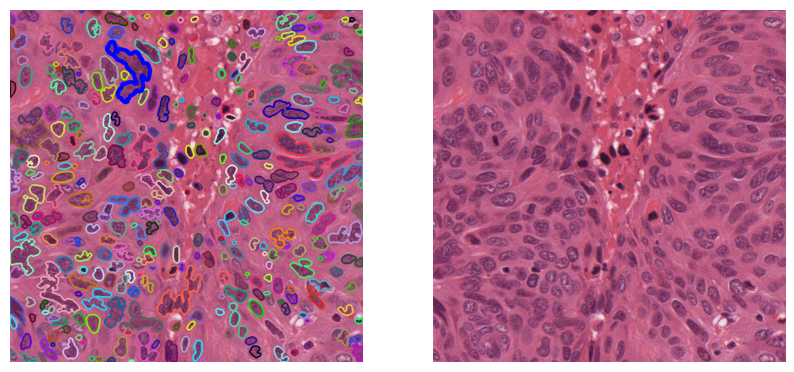

In [302]:
import copy
segmented_img = copy.deepcopy(img)

contours, h = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
n = 0

areas = []
biggest = { 'area': -1 }
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    if area > 50:
        areas.append(area)

        if area > biggest['area']:
            biggest['area'] = area
            biggest['contour'] = i

        colour = (0, 255, 0)
        colour = (randrange(255), randrange(255), randrange(255))
        cv2.drawContours(segmented_img, contours, i, colour, 3)
        n += 1

print('\nTake 2')
print('-----------------------')
print('Number of cells: ', n)
cv2.drawContours(segmented_img, contours, biggest['contour'], (255, 0, 0), 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.axis('off')

## Watershed

(-0.5, 999.5, 999.5, -0.5)

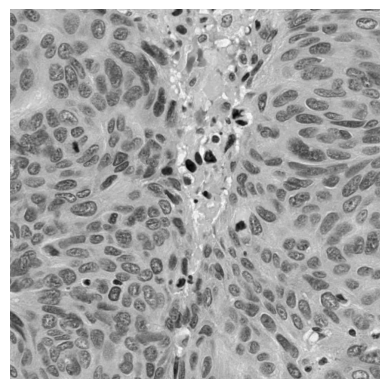

In [303]:
img = cv2.imread('data/TCGA-18-5592-01Z-00-DX1.tif')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # convert to rgb

gray = img[:, :, 2] # using only red channel
plt.imshow(gray, cmap='gray')
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

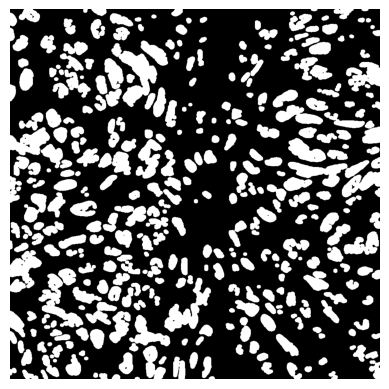

In [309]:
_, mask = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
mask = cv2.bitwise_not(mask)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

plt.imshow(mask, cmap='gray')
plt.axis('off')

calculating distance transform with euclidean distance

(-0.5, 999.5, 999.5, -0.5)

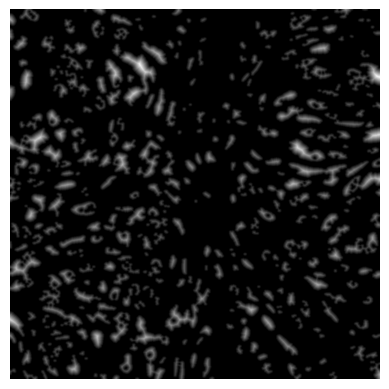

In [313]:
dist = cv2.distanceTransform(mask, cv2.DIST_L2, 3)

plt.imshow(dist, cmap='gray')
plt.axis('off')

thresholding and diletating the created distance map

(-0.5, 999.5, 999.5, -0.5)

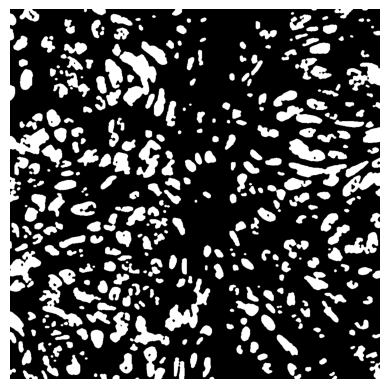

In [314]:
_, dist = cv2.threshold(dist, 5, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(7, 7))
dist = cv2.dilate(dist, kernel)

plt.imshow(dist, cmap='gray')
plt.axis('off')

creating markers for the watershed operation with connected components

In [315]:
_, markers = cv2.connectedComponents(np.uint8(dist))

(-0.5, 999.5, 999.5, -0.5)

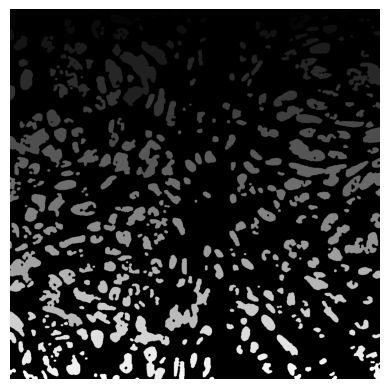

In [316]:
plt.imshow(markers, cmap='gray')
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

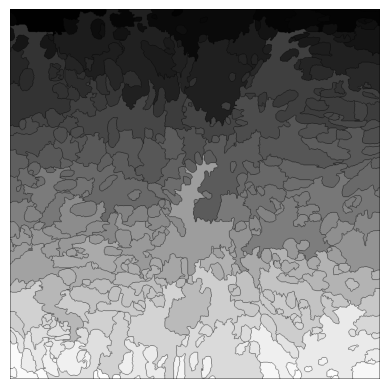

In [319]:
water = cv2.watershed(img, markers)
plt.imshow(water, cmap='gray')
plt.axis('off')